In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Look at the columns to review the data
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df['date'].max()
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
# This an alternate means to printing out the precipitaiton by month
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# The latest date is 2017-08-23, so we will retrieve from 2016-08-01 as the start date
# in order to get whole month values

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores
last_12mos = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date<='2017-07-31').\
    filter(Measurement.date>='2016-08-01').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last12_df = pd.DataFrame(last_12mos, columns= ['date', 'prcp'])


# Sort the dataframe by date
last12_df = last12_df.sort_values(by=['date'])
last12_df


#Before we plot, I thought it would be nice to group by month, using resample below
#This means, I will go back and collect data for whole months instead of just
#the last 12
last12_df['date'] = pd.to_datetime(last12_df['date'])
last12_df.index=last12_df['date']
last12_byMonth_df=last12_df.resample('M').sum()
last12_byMonth_df.index

DatetimeIndex(['2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31'],
              dtype='datetime64[ns]', name='date', freq='M')

In [22]:
# This an alternate means to printing out the precipitaiton by month
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# The latest date is 2017-08-23, so we will retrieve from 2016-08-01 as the start date
# in order to get whole month values

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores
last_12mos = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date<='2017-07-31').\
    filter(Measurement.date>='2016-08-01').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last12_df = pd.DataFrame(last_12mos, columns= ['date', 'prcp'])


# Sort the dataframe by date
last12_df = last12_df.sort_values(by=['date'])
last12_df


#Before we plot, I thought it would be nice to group by month, using resample below
#This means, I will go back and collect data for whole months instead of just
#the last 12
last12_df['date'] = pd.to_datetime(last12_df['date'])
last12_df.index=last12_df['date']
last12_byMonth_df=last12_df.resample('M').sum()
last12_byMonth_df.index

DatetimeIndex(['2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31'],
              dtype='datetime64[ns]', name='date', freq='M')

<IPython.core.display.Javascript object>


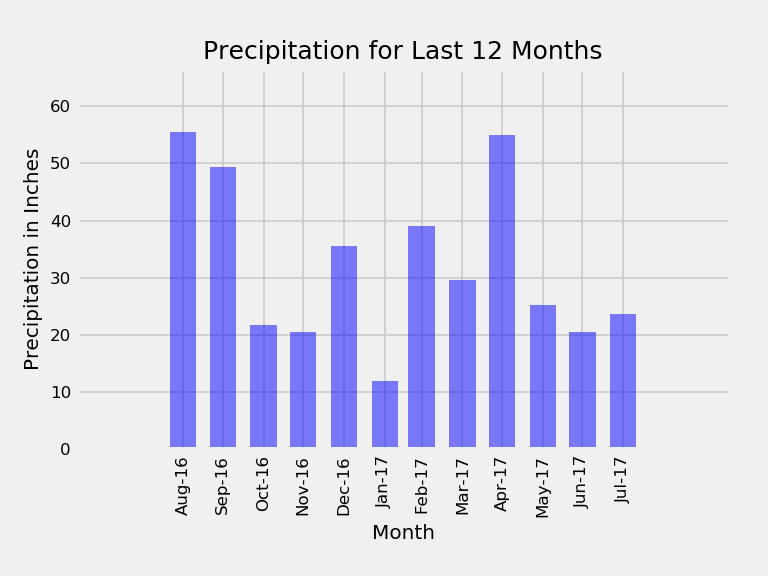

In [24]:
# UsePandas Plotting with Matplotlib to plot the data
x_axis = last12_byMonth_df.index
y_axis = last12_byMonth_df['prcp']
months = ['Aug-16', 'Sep-16', 'Oct-16', 'Nov-16' , 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17']
plt.bar(x_axis, y_axis, width=20, color='blue', alpha=0.5, align="center")

# Rotate the xticks for the dates
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, months, rotation='vertical', size=10)
plt.yticks(size=10)

# Define labels
plt.title("Precipitation for Last 12 Months",size=15)
plt.xlabel("Month", size=12)
plt.ylabel("Precipitation in Inches", size=12)


# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.22, left=0.10)
plt.show()

# Save figure
plt.savefig('Output/Daily Precipitation2.png')

<IPython.core.display.Javascript object>


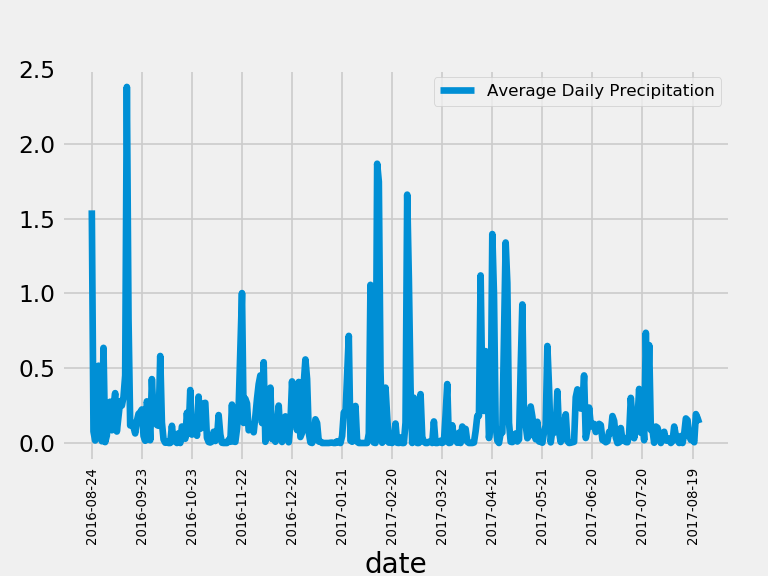

In [25]:
# Query last 12 months of precipitation data, drop any missing data and set date as index
prcp = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date > '2016-08-23').all()).\
                    sort_values(["date"]).dropna(how='any').set_index('date')

# There are multiple readings from different weather stations on a given day.
# Group by date and calculate average daily prcp.
avg_prcp = prcp.groupby(["date"]).mean()

# Plot a line graph of average prcp
avg_prcp.plot(kind='line')

# Manually add an xtick every 30 days
xtickpos = np.arange(0,len(avg_prcp),30)
xticklabel = [avg_prcp.iloc[rowidx].name for rowidx in xtickpos]           
plt.xticks(xtickpos,xticklabel, rotation=90, fontsize = 8)

# Add legend
plt.legend(['Average Daily Precipitation'], fontsize = 10)

# Adjust plot margins to show all the xticks and xlabel
plt.gcf().subplots_adjust(bottom=0.2)

# Save figure
plt.savefig('Output/Daily Precipitation.png')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# for the whole dataset of measurement
measurement_df.describe() 

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#for the last 12 whole months
last12_df.describe()

,prcp
count,2067.000000
mean,0.187557
std,0.475160
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [16]:
# How many stations are available in this dataset?
measurement_df['station'].value_counts().count()

9

In [17]:
#Look at the columns to review the data for stations
#Oh, I get it now. We need to grouby precipitation data, I think
station = pd.read_sql("SELECT * FROM station", conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [18]:
# What are the most active stations?
# List the stations and the counts in descending order.
# This is Pandas way to do it. Obviously, we can pull out just the 'id' column if we want to
measurement_df.groupby(['station']).count().sort_values(by='id', ascending=False)


,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.
# This is the SQL Alchemy way to do the same thing
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
                       order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# What are the most active stations?
# List the stations and the counts in descending order.
# This is the SQL Alchemy way to do the same thing
active_station = session.query(Measurement.station).group_by(Measurement.station).\
                       order_by(func.count(Measurement.id).desc()).first()

active_station = active_station[0]
active_station

'USC00519281'

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
MinMaxAvg=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              filter(Measurement.station==active_station).all()

print(f"Min temp: {MinMaxAvg[0][0]}")
print(f"Max temp: {MinMaxAvg[0][1]}")
print(f"Avg temp: {MinMaxAvg[0][2]}")

Min temp: 54.0
Max temp: 85.0
Avg temp: 71.66378066378067


<IPython.core.display.Javascript object>


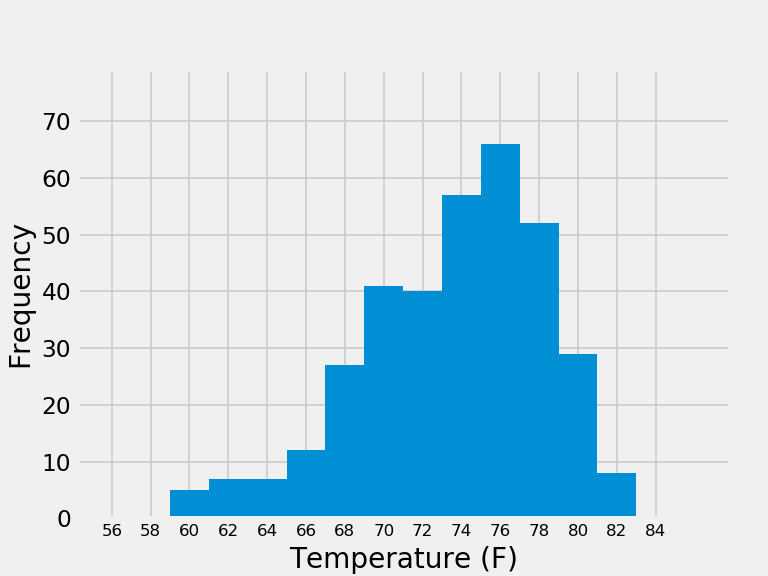

In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-23')\
                            .filter(Measurement.station == active_station).all())
temp

plt.figure()
n, bins, patches = plt.hist(temp["tobs"], bins = 12)

# Manually add an xtick every 2 degrees
xtickpos = np.arange(MinMaxAvg[0][0],MinMaxAvg[0][1]+1,2)
xticklabel = ["%.0f" % singlex for singlex in xtickpos]
plt.xticks(xtickpos,xticklabel, fontsize = 10)


# X & Y Label
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend

# Adjust plot margins, save figure and show
plt.margins(0.2)
plt.gcf().subplots_adjust(left = 0.1, bottom=0.1)
plt.savefig('Output/Temperature Histogram.png')
plt.show()

In [62]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [64]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Choosen trip date is 2018-10-01 to 2018-10-14. Since there is no October data for 2017, use data from 2016
tmin, tavg, tmax = calc_temps('2016-10-01', '2016-10-14') [0]

print(f'For my vacation window, the low temp is {tmin}, the average temp is {"%.1f" % tavg}, the high temp is {tmax}')

For my vacation window, the low temp is 71.0, the average temp is 77.8, the high temp is 82.0


<IPython.core.display.Javascript object>


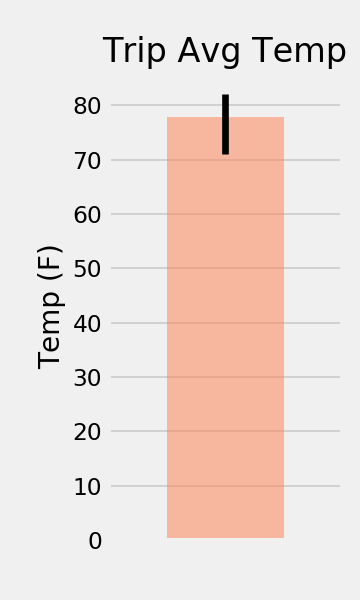

In [65]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig,ax = plt.subplots(figsize=(3,5))
ax.bar(0, tavg, align="center", width = 1, yerr = [[tavg-tmin],[tmax-tavg]], color = 'coral', alpha=0.5) 
ax.set_xlim([-1, 1])
plt.ylabel('Temp (F)')
ax.xaxis.grid(False)
plt.tick_params(labelbottom=False)
plt.title('Trip Avg Temp')
plt.gcf().subplots_adjust(left = 0.3, bottom=0.1)
plt.savefig('Output/Trip Avg Temp.png')
plt.show()


In [66]:
# Make a dataframe that contains prcp data for each station, averaged across the days within vacation window# Make a 
rainfall = pd.DataFrame(session.query(Measurement.prcp, Measurement.station).filter(Measurement.date >= '2016-10-01')\
                            .filter(Measurement.date <= '2016-10-14').all())\
                            .dropna(how='any').groupby('station').mean()

# Merge with info on each station, then sort in descending order by precipitation amount
station_info = pd.read_sql("SELECT station, name, latitude, longitude, elevation FROM station", engine)
combined = pd.merge(rainfall, station_info, on = 'station').sort_values(["prcp"], ascending = False).reset_index(drop=True)
combined

,station,prcp,name,latitude,longitude,elevation
0,USC00516128,0.491429,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00517948,0.070000,"PEARL CITY, HI US",21.39340,-157.97510,11.9
2,USC00519281,0.050714,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,USC00513117,0.021429,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,USC00514830,0.018182,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519523,0.005000,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519397,0.000000,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


## Optional Challenge Assignment

In [67]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [68]:
# Calculate the daily normals for your trip

# Strip the start and end dates for only month and day, then generate a list of datetime objects that goes from the
# start date to the end date
start = dt.datetime.strptime('2018-10-01', '%Y-%m-%d')
end = dt.datetime.strptime('2018-10-14', '%Y-%m-%d')
date_objects = [start + dt.timedelta(days=x) for x in range(0, (end-start).days+1)]

normals = []
# Iterate through the list of datetime objects, pass the month and day info into the daily_normals function
# Store the returned tmin, tavg, tmax into a dictionary
for eachday in date_objects:
    normals.append({'date':eachday.strftime("%Y-%m-%d"),
                    'tmin':daily_normals(eachday.strftime("%m-%d"))[0][0],
                    'tavg':daily_normals(eachday.strftime("%m-%d"))[0][1],
                    'tmax':daily_normals(eachday.strftime("%m-%d"))[0][2]})

# Convert to DataFrame
normal_df = pd.DataFrame(normals)
normal_df


,date,tavg,tmax,tmin
0,2018-10-01,75.229167,80.0,69.0
1,2018-10-02,76.260000,83.0,70.0
2,2018-10-03,76.730769,84.0,66.0
3,2018-10-04,75.862745,82.0,67.0
4,2018-10-05,76.166667,84.0,67.0
5,2018-10-06,75.420000,81.0,70.0
6,2018-10-07,75.607843,81.0,68.0
7,2018-10-08,76.326531,86.0,66.0
8,2018-10-09,76.113636,84.0,69.0
9,2018-10-10,75.854167,83.0,69.0


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


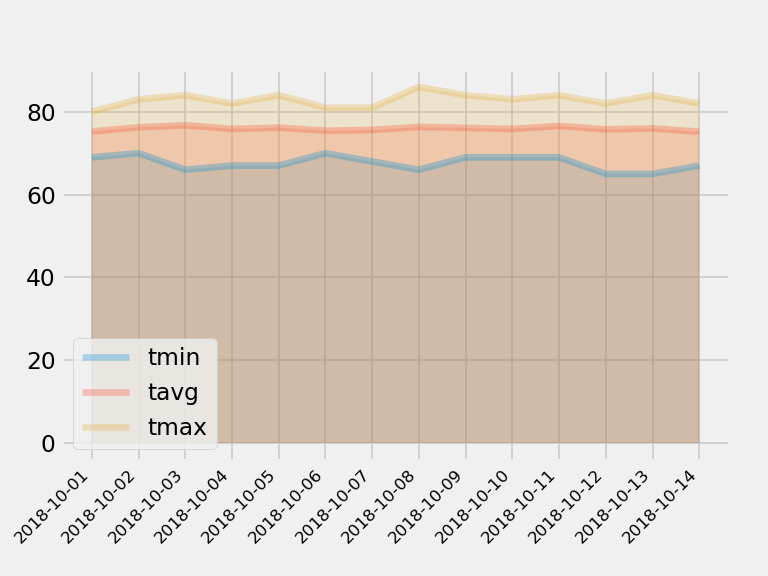

In [71]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure()

# Create a function that plots the line graph and fills in the area below the line
def areaplot(x,y):
    plt.plot(x, y,  alpha=0.3)
    plt.fill_between(x, y,  alpha=0.2)

# Plot tmin, tavg, tmax across the vacation window
areaplot(normal_df["date"],normal_df["tmin"])
areaplot(normal_df["date"],normal_df["tavg"])
areaplot(normal_df["date"],normal_df["tmax"])

# Format Plot, save, and show
plt.xticks(rotation = 45, fontsize = 10,horizontalalignment='right')
plt.gcf().subplots_adjust(bottom=0.2)
plt.legend()
plt.savefig('Output/Normals.png')
plt.show()